# Create multiple documents from a Base Document
I've got a deadline tomorrow, so now seems like a good time to write up a notebook to respond to this tweet from [@OStrawczy](https://twitter.com/OStrawczy)
> I have a doc & need 13 versions of it for jurisdictions with slightly different requirements in each jurisdiction.
> I need a tool that lets me prepare a base document, a set of jurisdiction-specific diffs, and an audit trail linking the diff to the change.

https://twitter.com/OStrawczy/status/1397635455550640130

Outlined below is a simple quick method to accomplish such a task using free tools, but may not be for everyone, however, it is presented here as a first introduction as to how this can work 'under the hood'. As you mature the code, I would suspect a prettier, more user friendly web based front end interface handling the business logic and entering the text would make this a simpler task for the person generating the documents. 

**This is not meant as a tutorial or lesson, but a 'jump right in' demonstration of what can be done.**

## Step one: Create the base document
Create the base document in Word (I've made the assumption we're discussing Word as 99% percent of the lawyers I know mean Word when they think document).

There is a bit of a craft to this bit, finding the right ways to construct the document such that it lends itself well to the scenario described. We aim to use some common generic to all case phrases, and limit the special cases to areas we can overwrite for each jurisdiction.

Create a document like the following:
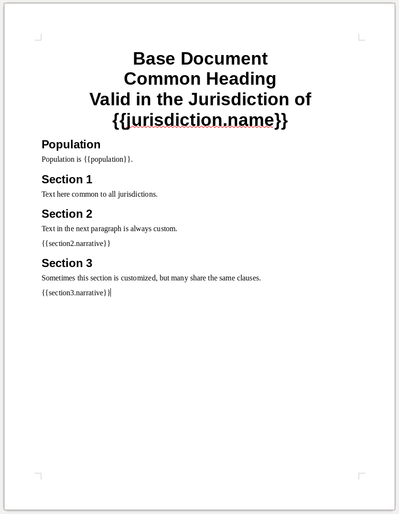

Note the placeholder text is stored in double curly braces. 

## Step two: Create your BaseDocument
Include all the default/common bits in here.

In [34]:
# let's setup a base document class. 
# We are purposefully keeping this as bare as we can for illustrative purposes, however, 
# complicated enough that the move to introducing more complicated tools for each jurisdiction
# is possible

# import the library that does all the heavy lifting with the Word XML
from docxtpl import DocxTemplate
import datetime as Datetime

class BaseDocument():
    
    def __init__(self, base_template, output_name, data):
        # this is the template to use (in this case stored in same path as this script)
        self.base_template = base_template   
        # name of the new file to save
        self.output_name = output_name       
        # the wording that gets substituted in to the document
        self.data = data
        
    def population(self):
        # this could be anything that reaches out to the internet to find a value,
        # a function that pulls from your time and billing system to calculate a 
        # future date (ex: the first non holiday Monday 180 days from now). We'll
        # just return a population. If it was truly static like this, we may just
        # elect to pass it in as part of the data
        return "37.59 million (2019)"
        
    def build_document(self):
        doc = DocxTemplate(self.base_template)
        context = self.data
        context.update({'population': self.population(), })
        doc.render(context)
        doc.save(self.output_name)

In [35]:
# let's setup the common, base case bits of data
base_document_data = {'jurisdiction': {'name':'Country of Canada',},
                      'section2': {'narrative': 'This is the base narrative.'},
                      'section3': {'narrative': 'This is the common narrative.'}
                     }

In [36]:
# Setup a base document instance of a document we want to create
my_base_doc = BaseDocument(base_template='base_document.docx',
                           output_name=f'base_document_{Datetime.datetime.now():%Y-%m-%d %H:%M}.docx',
                           data=base_document_data
                           )

In [37]:
# and now call the build_document to create the document
my_base_doc.build_document()

At this point we should have a new document called something like base_document_2021-05-26 22:22.docx that looks like:
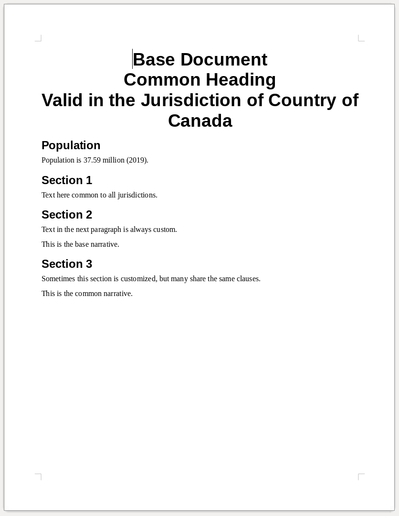

## Step Three: Jurisdictions
Now, let's get into some jurisdictional stuff. We'll create some object names with some potential jurisdictions, but we'd probably be pulling from a list somewhere for the jurisdictions.

In [44]:
# let's say Ontario is just like the base, but the section 2 narrative is different
# Note we only need to include the things that are different, but we can resupply everything if we want to
ontario_document_data = {'jurisdiction': {'name':'Province of Ontario',},
                         'section2': {'narrative': 'Ontario, your''s to discover'}}

In [45]:
# if we create a merged copy of the two sets of document_data we get
# something we can send to the BaseDocumentClass
my_ontario_doc = BaseDocument(base_template='base_document.docx',
                              output_name=f'ontario_generated.docx',
                              data={**base_document_data, **ontario_document_data})

In [46]:
# build an ontario document with the base class
my_ontario_doc.build_document()

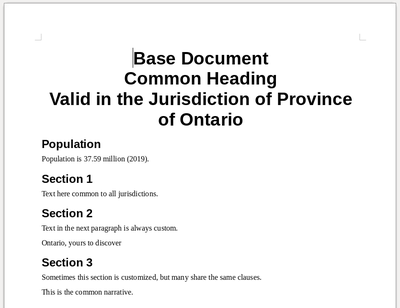

But we are still calling the BaseDocument class using the base population method. Perhaps there is something super special about the Ontario documents we need to do. Anything from a different calculation that is used in generating a value, a different method of generating a schedule for dates or any number of specialized things. For those reasons, it can make sense to have a separate class for this jurisdiction, based on the BaseDocument, but contains some special things for the jurisdiction. 

For this we use inheritance. The OntarioDocument class will inherit all of the traits of the base, but override the population function.

In [43]:
# create a special class for OntarioDocuments which inherit 
# everything from base, but override the population calculation
# this OntarioDocument can do everything the BaseDocument can do, but 
# has its own population method

class OntarioDocument(BaseDocument):
    
    def population(self):
        return "14.57 million (2019)"

In [40]:
# now create a new document using the OntatioDocument class
my_new_ontario_doc = OntarioDocument(base_template='base_document.docx',
                                     output_name=f'ontario_generated.docx',
                                     data={**base_document_data, **ontario_document_data})
my_new_ontario_doc.build_document()

Now we'll get a document with the population with the method described in the OntarioDocument class.
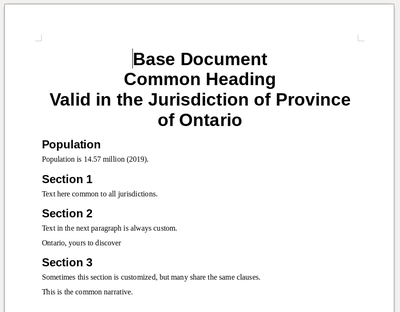

## Where to go?
This scratches the surface. The libary used to create the documents supports looping, conditionals and all sort of good stuff which one may want to do when creating a schedule of payments, or a list of hearing dates. 

You are also not limited to jurisdictions. Perhaps this is a partner bio project that gets updated every year, but that New Brunswick office likes to do things a little bit differently so you you may need a special sub-class of the partner bio common class. 

There really is no limit to what can be done. Given the extensive set of libraries available, the relatively easy to get started learning curve, and the ability to reach in to your own datasets (like your time and billing database), you could be automating your way to a week off in no time.